In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor

# 롤토크 데이터


### 파일 읽고 간단한 정리 & 데이터 분포 살펴보기

In [2]:
df = pd.read_csv("../data/PART_I/file.csv")

In [3]:
df.head()

,Chemical1,Chemical2,Chemical3,Chemical4,Chemical5,Chemical6,Chemical7,Chemical8,Chemical9,Chemical10,...,Var47,Category8,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55
0,0.076,1.526,0.018,0.01,0.0,0.01,0.289,0.0084,0.0014,0.021,...,1724,A,1202.8,1203.0,295.0,0.339933,2.674576,220.800000,1860.925926,0.699114
1,0.076,1.526,0.018,0.01,0.0,0.01,0.289,0.0084,0.0014,0.021,...,1718,A,1202.8,1203.0,295.0,0.339933,2.674576,273.600000,2329.380531,0.137082
2,0.076,1.526,0.018,0.01,0.0,0.01,0.289,0.0084,0.0014,0.021,...,1720,A,1202.8,1203.0,295.0,0.339933,2.674576,294.067797,2382.300000,0.128763
3,0.076,1.526,0.018,0.01,0.0,0.01,0.289,0.0084,0.0014,0.021,...,1719,A,1202.8,1203.0,295.0,0.339933,2.674576,348.181818,2616.914894,0.550319
4,0.076,1.526,0.018,0.01,0.0,0.01,0.289,0.0084,0.0014,0.021,...,4140,B,1202.8,1203.0,295.0,0.339933,2.674576,561.320755,4749.130435,0.290308


In [4]:
# Variable 정리

Category_variables = ['Category1', 'Category2', 'Category3', 'Category4', 'Category5', 'Category6', 'Category7', 'Category8']
Numeric_variables = ['Chemical1', 'Chemical2', 'Chemical3', 'Chemical4', 'Chemical5','Chemical6', 'Chemical7', 'Chemical8', 'Chemical9', 'Chemical10', 'Chemical11', 'Chemical12', 'Chemical13', 'Chemical14',
                     'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9', 'Var10', 'Var11', 'Var12', 'Var13',
                     'Var14', 'Var15', 'Var16', 'Var17', 'Var18', 'Var19', 'Var20', 'Var21','Var22', 'Var23', 'Var24', 'Var25', 'Var26', 'Var27', 'Var28', 'Var29',
                     'Var30', 'Var31', 'Var32', 'Var33', 'Var34', 'Var35', 'Var36', 'Var37', 'Var38', 'Var39', 'Var40', 'Var41', 'Var42', 'Var43',
                     'Var44', 'Var45', 'Var46', 'Var47', 'Var48', 'Var49', 'Var50', 'Var51', 'Var52', 'Var53', 'Var54', 'Var55']
Temperature_variable = ['Temperature']
Target_variables = ['Target']

In [5]:
df = df[Category_variables + Numeric_variables + Temperature_variable + Target_variables]

In [6]:
df

,Category1,Category2,Category3,Category4,Category5,Category6,Category7,Category8,Chemical1,Chemical2,...,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55,Temperature,Target
0,A,2.0,4.0,W,4,1,0.0,A,0.0760,1.526,...,1202.8,1203.0,295.0,0.339933,2.674576,220.800000,1860.925926,0.699114,1157.0,285.0
1,A,2.0,4.0,W,4,0,1.0,A,0.0760,1.526,...,1202.8,1203.0,295.0,0.339933,2.674576,273.600000,2329.380531,0.137082,1157.0,305.0
2,A,2.0,4.0,W,4,0,0.0,A,0.0760,1.526,...,1202.8,1203.0,295.0,0.339933,2.674576,294.067797,2382.300000,0.128763,1157.0,309.0
3,A,2.0,4.0,W,4,0,0.0,A,0.0760,1.526,...,1202.8,1203.0,295.0,0.339933,2.674576,348.181818,2616.914894,0.550319,1157.0,344.0
4,A,2.0,4.0,W,4,1,0.0,B,0.0760,1.526,...,1202.8,1203.0,295.0,0.339933,2.674576,561.320755,4749.130435,0.290308,1157.0,633.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83573,D,1.0,1.0,W,1,1,0.0,B,0.2048,0.283,...,1199.8,1199.8,221.0,0.261833,2.638009,451.886793,3677.045455,NaN,1137.0,428.0
83574,D,1.0,1.0,W,1,0,0.0,B,0.2048,0.283,...,1199.8,1199.8,221.0,0.261833,2.638009,471.717172,3699.882353,NaN,1137.0,450.0
83575,D,1.0,1.0,W,1,0,0.0,B,0.2048,0.283,...,1199.8,1199.8,221.0,0.261833,2.638009,507.142857,3753.908046,NaN,1137.0,512.0
83576,D,1.0,1.0,W,1,0,0.0,B,0.2048,0.283,...,1199.8,1199.8,221.0,0.261833,2.638009,554.000000,4018.152174,NaN,1137.0,559.0


### 분석을 위한 전처리

In [7]:
df.isnull().sum()

Category1          3
Category2          3
Category3          3
Category4          0
Category5          0
               ...  
Var53              1
Var54              0
Var55          27266
Temperature        3
Target             1
Length: 79, dtype: int64

In [8]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

Var55        27266
Category2        3
Category1        3
Chemical4        3
Chemical3        3
             ...  
Var45            0
Var43            0
Var51            0
Var52            0
Var54            0
Length: 79, dtype: int64

In [9]:
df = df.drop(["Var55"], axis = 1)

In [10]:
df.isnull().sum()

Category1      3
Category2      3
Category3      3
Category4      0
Category5      0
              ..
Var52          0
Var53          1
Var54          0
Temperature    3
Target         1
Length: 78, dtype: int64

In [11]:
Numeric_variables.remove("Var55")
df = df.dropna(axis = 0)                # 결측값 있는 행 삭제

-------------


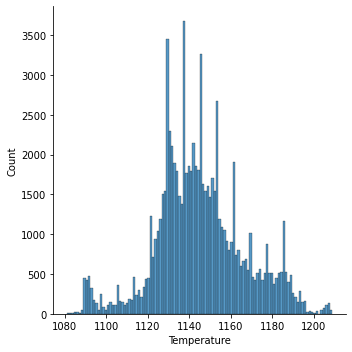

In [12]:
# for i in df.columns :
#   print( "-------------")
#   sns.displot(df[i])
#   plt.show()

print( "-------------")
sns.displot(df['Temperature'])
plt.show()

-------------


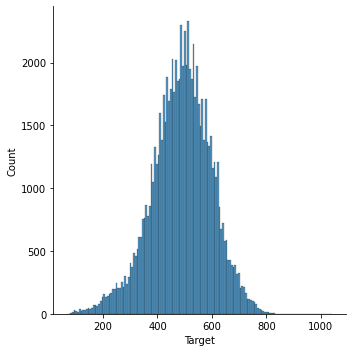

In [34]:
print( "-------------")
sns.displot(df['Target'])
plt.show()

-------------


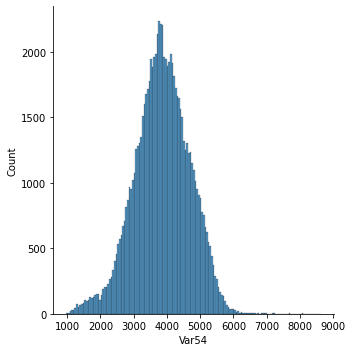

In [33]:
print( "-------------")
sns.displot(df['Var54'])
plt.show()

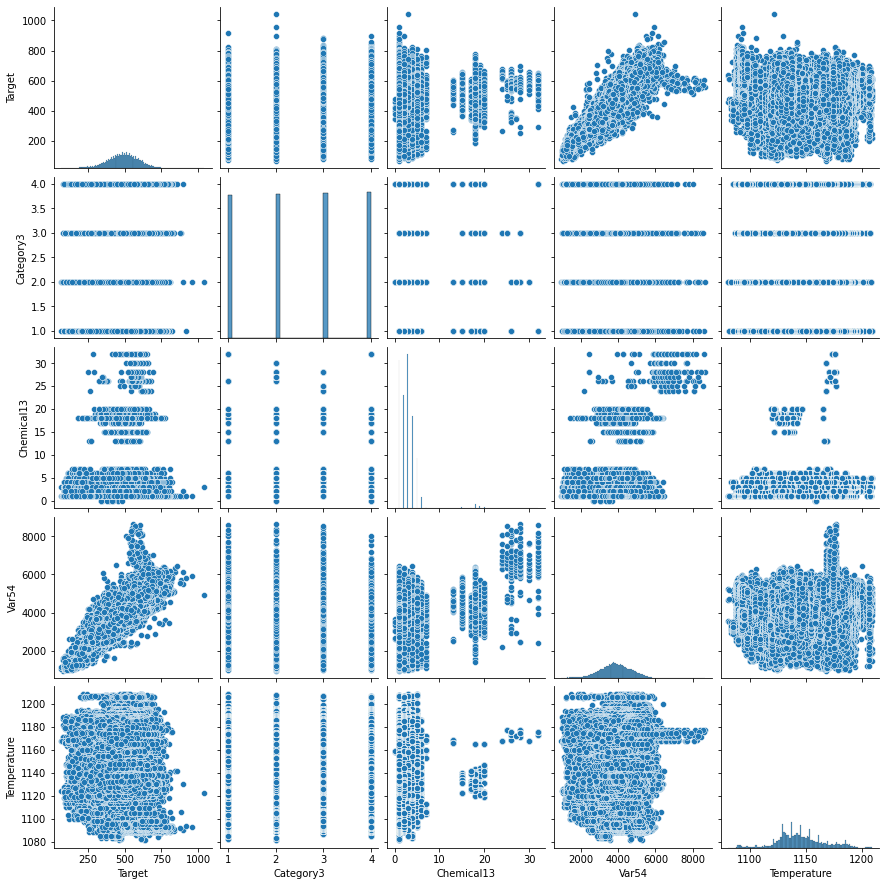

In [13]:
# 변수 간 관계를 시각화
sns.pairplot(df[["Target",
                 "Category3",
                 "Chemical13",
                 "Var54",
                 "Temperature"]])
plt.show()

#### One-hot Encoding

In [13]:
df[Category_variables].dtypes

Category1     object
Category2    float64
Category3    float64
Category4     object
Category5      int64
Category6      int64
Category7    float64
Category8     object
dtype: object

In [14]:
df[Category_variables] = df[Category_variables].astype("category")

In [15]:
df[Category_variables].dtypes

Category1    category
Category2    category
Category3    category
Category4    category
Category5    category
Category6    category
Category7    category
Category8    category
dtype: object

In [16]:
df["Category2"].unique()

[2.0, 1.0]
Categories (2, float64): [1.0, 2.0]

In [17]:
for i in Category_variables :
  print(i)
  print(df[i].unique())
  print("===============")

Category1
['A', 'B', 'D', 'N', 'E', ..., 'C', 'G', 'I', 'K', 'L']
Length: 14
Categories (14, object): ['A', 'B', 'C', 'D', ..., 'K', 'L', 'M', 'N']
Category2
[2.0, 1.0]
Categories (2, float64): [1.0, 2.0]
Category3
[4.0, 2.0, 3.0, 1.0]
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]
Category4
['W', 'C']
Categories (2, object): ['C', 'W']
Category5
[4, 1, 3]
Categories (3, int64): [1, 3, 4]
Category6
[1, 0]
Categories (2, int64): [0, 1]
Category7
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Category8
['A', 'B']
Categories (2, object): ['A', 'B']


In [18]:
ohe_encoding = pd.get_dummies(df[Category_variables])

In [19]:
ohe_encoding

,Category1_A,Category1_B,Category1_C,Category1_D,Category1_E,Category1_F,Category1_G,Category1_H,Category1_I,Category1_J,...,Category4_W,Category5_1,Category5_3,Category5_4,Category6_0,Category6_1,Category7_0.0,Category7_1.0,Category8_A,Category8_B
0,True,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,False,True,False
1,True,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,False,True,True,False
2,True,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,True,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,True,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83573,False,False,False,True,False,False,False,False,False,False,...,True,True,False,False,False,True,True,False,False,True
83574,False,False,False,True,False,False,False,False,False,False,...,True,True,False,False,True,False,True,False,False,True
83575,False,False,False,True,False,False,False,False,False,False,...,True,True,False,False,True,False,True,False,False,True
83576,False,False,False,True,False,False,False,False,False,False,...,True,True,False,False,True,False,True,False,False,True


In [20]:
df = df.drop(Category_variables, axis = 1)

In [21]:
df.columns

Index(['Chemical1', 'Chemical2', 'Chemical3', 'Chemical4', 'Chemical5',
       'Chemical6', 'Chemical7', 'Chemical8', 'Chemical9', 'Chemical10',
       'Chemical11', 'Chemical12', 'Chemical13', 'Chemical14', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9', 'Var10',
       'Var11', 'Var12', 'Var13', 'Var14', 'Var15', 'Var16', 'Var17', 'Var18',
       'Var19', 'Var20', 'Var21', 'Var22', 'Var23', 'Var24', 'Var25', 'Var26',
       'Var27', 'Var28', 'Var29', 'Var30', 'Var31', 'Var32', 'Var33', 'Var34',
       'Var35', 'Var36', 'Var37', 'Var38', 'Var39', 'Var40', 'Var41', 'Var42',
       'Var43', 'Var44', 'Var45', 'Var46', 'Var47', 'Var48', 'Var49', 'Var50',
       'Var51', 'Var52', 'Var53', 'Var54', 'Temperature', 'Target'],
      dtype='object')

In [22]:
df = pd.concat([ohe_encoding, df], axis = 1)

In [23]:
df.columns

Index(['Category1_A', 'Category1_B', 'Category1_C', 'Category1_D',
       'Category1_E', 'Category1_F', 'Category1_G', 'Category1_H',
       'Category1_I', 'Category1_J',
       ...
       'Var47', 'Var48', 'Var49', 'Var50', 'Var51', 'Var52', 'Var53', 'Var54',
       'Temperature', 'Target'],
      dtype='object', length=101)

In [24]:
Category_variables = ohe_encoding.columns

In [25]:
Category_variables

Index(['Category1_A', 'Category1_B', 'Category1_C', 'Category1_D',
       'Category1_E', 'Category1_F', 'Category1_G', 'Category1_H',
       'Category1_I', 'Category1_J', 'Category1_K', 'Category1_L',
       'Category1_M', 'Category1_N', 'Category2_1.0', 'Category2_2.0',
       'Category3_1.0', 'Category3_2.0', 'Category3_3.0', 'Category3_4.0',
       'Category4_C', 'Category4_W', 'Category5_1', 'Category5_3',
       'Category5_4', 'Category6_0', 'Category6_1', 'Category7_0.0',
       'Category7_1.0', 'Category8_A', 'Category8_B'],
      dtype='object')

#### 데이터 나누기

In [26]:
df_cat1 = df[df['Temperature'] < 1100].copy().reset_index(drop=True)                                            # 인덱스 왜 새로하지?
df_cat2 = df[(df['Temperature'] >= 1100) & (df['Temperature'] < 1120)].copy().reset_index(drop=True)
df_cat3 = df[(df['Temperature'] >= 1120) & (df['Temperature'] < 1140)].copy().reset_index(drop=True)
df_cat4 = df[(df['Temperature'] >= 1140) & (df['Temperature'] < 1160)].copy().reset_index(drop=True)
df_cat5 = df[df['Temperature'] >= 1160].copy().reset_index(drop=True)

df_all = df.copy()

#### 온도 구간별 데이터 각각 Train/Validation/Test set 나누기

In [43]:
df_cat1_train = df_cat1.iloc[:int(len(df_cat1)*0.8), :].copy().reset_index(drop=True)
df_cat1_vald = df_cat1.iloc[int(len(df_cat1)*0.8):int(len(df_cat1)*0.9), :].copy().reset_index(drop=True)
df_cat1_test = df_cat1.iloc[int(len(df_cat1)*0.9):, :].copy().reset_index(drop=True)

In [28]:
# print( "-------------")
# sns.displot(df_cat1_train['Temperature'])
# plt.show()

# print( "-------------")
# sns.displot(df_cat1_vald['Temperature'])
# plt.show()

# print( "-------------")
# sns.displot(df_cat1_test['Temperature'])
# plt.show()

In [29]:
def data_divide(df):
  """
  왜 순서대로 슬라이싱하지?   
  """

  train_df = df.iloc[:int(len(df)*0.8),:].copy().reset_index(drop=True)
  vald_df = df.iloc[int(len(df)*0.8):int(len(df)*0.9),:].copy().reset_index(drop=True)
  test_df = df.iloc[int(len(df)*0.9):,:].copy().reset_index(drop=True)

  return train_df, vald_df, test_df

In [ ]:
df_cat1_train, df_cat1_vald, df_cat1_test = data_divide(df_cat1)
df_cat2_train, df_cat2_vald, df_cat2_test = data_divide(df_cat2)
df_cat3_train, df_cat3_vald, df_cat3_test = data_divide(df_cat3)
df_cat4_train, df_cat4_vald, df_cat4_test = data_divide(df_cat4)
df_cat5_train, df_cat5_vald, df_cat5_test = data_divide(df_cat5)
df_all_train, df_all_vald, df_all_test = data_divide(df_all)                        #### 인덱스 기준으로 t/v/t 데이터셋 나누는데 문제 생길듯 > 랜덤으로 

# 데이터 분석

In [31]:
clf = RandomForestRegressor(max_depth = 10, random_state = 0)

In [32]:
clf.fit(df_cat1_train[list(Category_variables)+Numeric_variables],
        df_cat1_train[Target_variables])

c:\Users\DANIK\anaconda3\envs\diwork_latest\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, random_state=0)

In [51]:
train_predict = clf.predict(df_cat1_train[list(Category_variables)+Numeric_variables])
vald_predict = clf.predict(df_cat1_vald[list(Category_variables)+Numeric_variables])
test_predict = clf.predict(df_cat1_test[list(Category_variables)+Numeric_variables])

In [ ]:
pd.DataFrame(train_predict)

,0
0,726.012006
1,663.582226
2,631.634121
3,610.212145
4,495.785126
...,...
244,665.552095
245,313.035289
246,338.146730
247,348.305290


In [ ]:
df_cat1_train[Target_variables]

,Target
0,743.0
1,700.0
2,638.0
3,631.0
4,506.0
...,...
244,680.0
245,295.0
246,329.0
247,338.0


In [58]:
print("MSE")
print(mean_squared_error(train_predict,df_cat1_train[Target_variables]))
print("RMSE")
print(np.sqrt(mean_squared_error(train_predict,df_cat1_train[Target_variables])))
print("R_score")
print(r2_score(train_predict,df_cat1_train[Target_variables]))

MSE
81.13293460889277
RMSE
9.007382228422017
R_score
0.9941170806266085


In [54]:
print("MSE")
print(mean_squared_error(test_predict,df_cat1_test[Target_variables]))
print("RMSE")
print(np.sqrt(mean_squared_error(test_predict,df_cat1_test[Target_variables])))
print("R_score")
print(r2_score(test_predict,df_cat1_test[Target_variables]))

MSE
448.72906113935846
RMSE
21.183225937976456
R_score
0.9557658249978153


c:\Users\DANIK\anaconda3\envs\diwork_latest\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE
25259.049560000007
RMSE
158.93095846939326


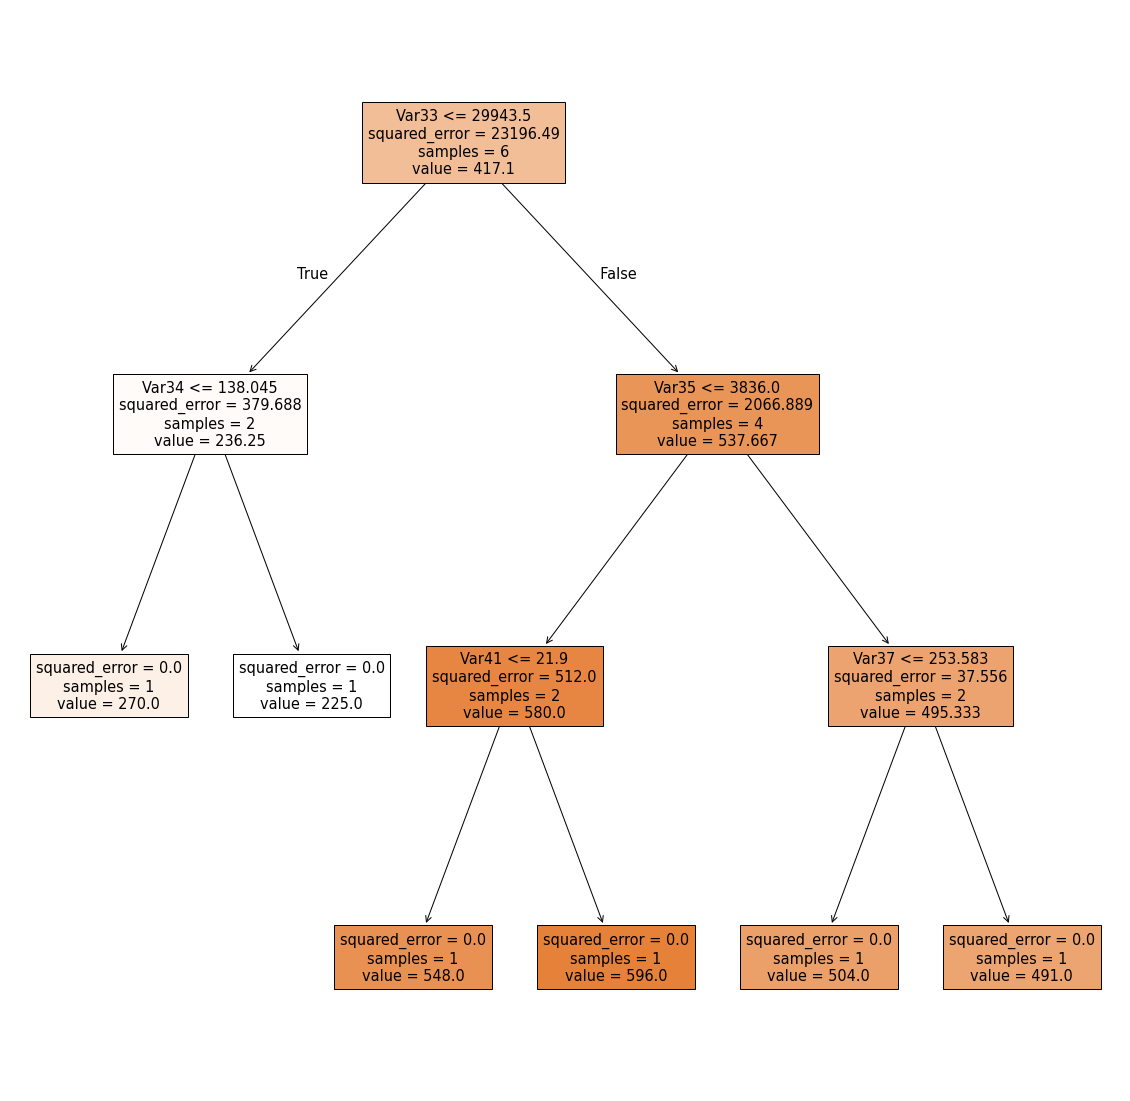

In [59]:
# 일부 샘플만을 이용해 랜덤 포레스트 트리 학습

from sklearn import tree

sample_select = 10

X_train_rfr = df_cat1_train[list(Category_variables)+Numeric_variables][0:int(sample_select)]
y_train_rfr = df_cat1_train[Target_variables][0:int(sample_select)]
X_test_rfr = df_cat1_test[list(Category_variables)+Numeric_variables][0:int(sample_select)]
y_test_rfr = df_cat1_test[Target_variables][0:int(sample_select)]

rfr_vis = RandomForestRegressor(max_depth=10, random_state=0)
rfr_vis.fit(X_train_rfr, y_train_rfr)
y_preds_rfr = rfr_vis.predict(X_test_rfr)
mse = mean_squared_error(y_test_rfr, y_preds_rfr)
rmse = np.sqrt(mse)

print("MSE")
print(mse)
print("RMSE")
print(rmse)

# 랜덤 포레스트 개별 결정 트리 중 하나를 시각화하는 코드

plt.figure(figsize=(20,20))

_ = tree.plot_tree(rfr_vis.estimators_[2], feature_names=X_test_rfr.columns, filled=True)

In [60]:
# AdaboostRegression 활용하기

from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators = 100, random_state=0)
ada.fit(df_cat1_train[list(Category_variables)+Numeric_variables],
        df_cat1_train[Target_variables])
ada_train_predict = ada.predict(df_cat1_train[list(Category_variables)+Numeric_variables])
ada_vald_predict = ada.predict(df_cat1_vald[list(Category_variables)+Numeric_variables])
ada_test_predict = ada.predict(df_cat1_test[list(Category_variables)+Numeric_variables])

c:\Users\DANIK\anaconda3\envs\diwork_latest\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
print("MSE")
print(mean_squared_error(ada_test_predict,df_cat1_test[Target_variables]))
print("RMSE")
print(np.sqrt(mean_squared_error(ada_test_predict,df_cat1_test[Target_variables])))
print("R_score")
print(r2_score(ada_test_predict,df_cat1_test[Target_variables]))

MSE
960.5525879950644
RMSE
30.99278283721977
R_score
0.8862671981865852


#  분석 결과 시각화

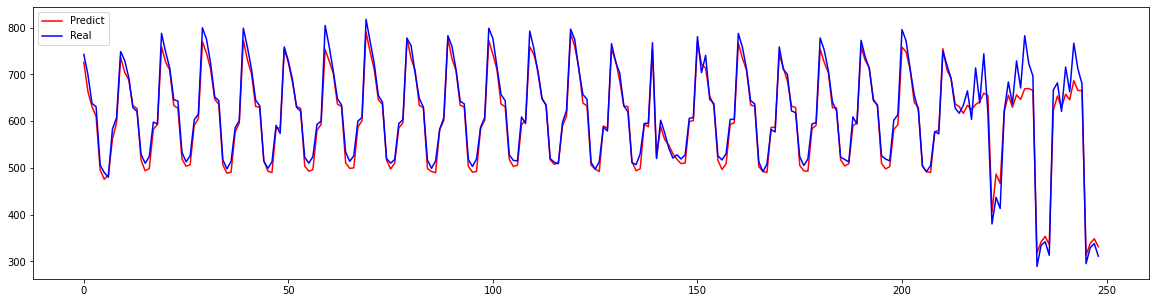

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(test_predict, c = 'r', label = 'Predict')
plt.plot(df_cat1_test[Target_variables], c='b', label = 'Real')
plt.legend()

### 인덱스 200번 이후의 그래프는 이상치 아닌가? 다른 온도에서도 비슷한 패턴인지 확인이 필요

In [65]:
df_cat1_test[Target_variables]

,Target
0,743.0
1,700.0
2,638.0
3,631.0
4,506.0
...,...
244,680.0
245,295.0
246,329.0
247,338.0


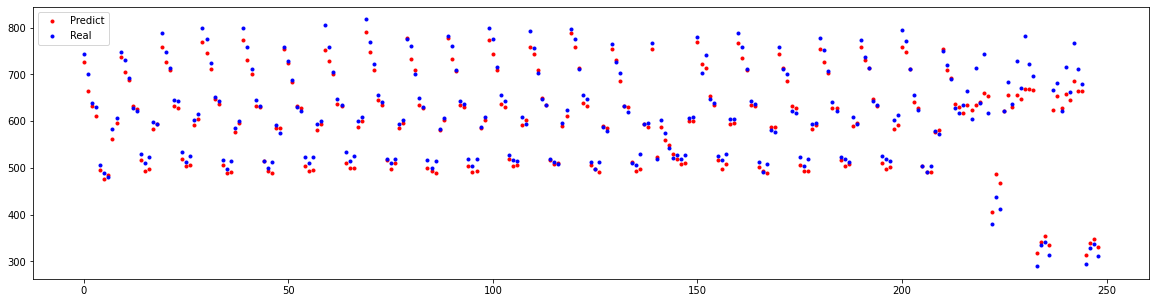

In [63]:
plt.figure(figsize=(20,5))
plt.scatter(range(0,len(df_cat1_test)), test_predict, marker = '.', c = 'red', label = 'Predict')
plt.scatter(range(0,len(df_cat1_test)), df_cat1_test[Target_variables], marker = '.', c = 'b', label = 'Real')
plt.legend()